# WeatherAPI
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
# Intialize lists and variables to prepare for the API calls
url = "https://api.openweathermap.org/data/2.5/weather?"
found_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
counter_50 = 0

# Loop through the cities list to get weather data and append results to lists
for city in cities:
    print(f"Fetching data for city: {city}")
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print(f"200: {city} data found")
        found_cities.append(city)
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
    else:
        print(f"ERROR: {city} data not found")
    counter_50 += 1
    if counter_50 >= 49:
        print("---Waiting 60 seconds---")
        time.sleep(60)
        counter_50 = 0
        print("---Resuming---")

# Check to make sure all the lists are the same length:
print("\n\n\n---Lists Check---")
if len(lat) == len(found_cities):
    print("Lat checks out")
else:
    print(" Lat has a problem")
if len(lng) == len(found_cities):
    print("lng checks out")
else:
    print("lng has a problem")
if len(max_temp) == len(found_cities):
    print("max_temp checks out")
else:
    print("max_temp has a problem")
if len(humidity) == len(found_cities):
    print("humidity checks out")
else:
    print("humidity has a problem")
if len(cloudiness) == len(found_cities):
    print("cloudiness checks out")
else:
    print("cloudiness has a problem")
if len(wind_speed) == len(found_cities):
    print("wind_speed checks out")
else:
    print("wind_speed has a problem")
if len(country) == len(found_cities):
    print("country checks out")
else:
    print("country has a problem")
if len(date) == len(found_cities):
    print("date checks out")
else:
    print("date has a problem")

Fetching data for city: margaret river
200: margaret river data found
Fetching data for city: port-aux-francais
200: port-aux-francais data found
Fetching data for city: ust-nera
200: ust-nera data found
Fetching data for city: ribeira grande
200: ribeira grande data found
Fetching data for city: howrah
200: howrah data found
Fetching data for city: puerto natales
200: puerto natales data found
Fetching data for city: tralee
200: tralee data found
Fetching data for city: dhidhdhoo
200: dhidhdhoo data found
Fetching data for city: lebu
200: lebu data found
Fetching data for city: talnakh
200: talnakh data found
Fetching data for city: rabo de peixe
200: rabo de peixe data found
Fetching data for city: peace river
200: peace river data found
Fetching data for city: bilibino
200: bilibino data found
Fetching data for city: bethel
200: bethel data found
Fetching data for city: hawaiian paradise park
200: hawaiian paradise park data found
Fetching data for city: adamstown
200: adamstown dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_df = pd.DataFrame({"city":found_cities, "Lat":lat, "Lng": lng, "Max Temp":max_temp, "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Country":country, "Date":date})
city_weather_df.head()
city_weather_df.to_csv(output_data_file, index=False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
print(city_weather_df.shape)
city_weather_df.describe()
# There are no cities with humidy > 100%, skipping the next steps

(566, 9)


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.802832,23.317920,286.006431,73.678445,63.498233,3.446572,1.710292e+09
std,32.340720,87.020510,14.761461,21.287974,39.577537,2.435590,4.648489e+02
min,-54.800000,-176.559700,244.070000,10.000000,0.000000,0.000000,1.710291e+09
25%,-4.995675,-47.882375,275.670000,63.000000,20.000000,1.712500,1.710292e+09
50%,26.410100,25.985050,289.890000,79.500000,76.000000,2.935000,1.710292e+09
75%,47.928375,92.537525,298.882500,89.000000,100.000000,4.630000,1.710293e+09
max,78.218600,179.194200,306.150000,100.000000,100.000000,18.110000,1.710293e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

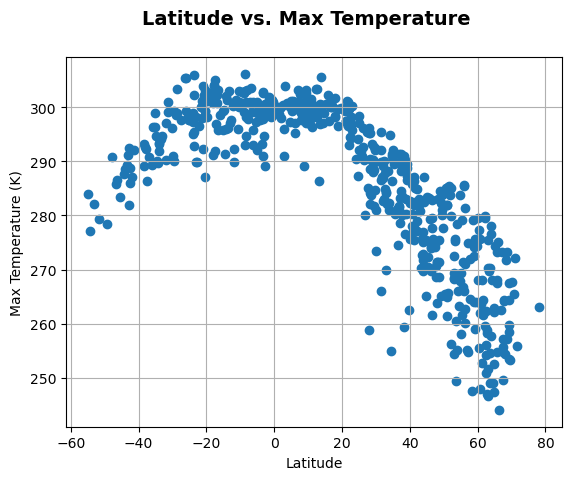

In [7]:
# Plotting
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"])
plt.grid(True)

# Setting labels
plt.suptitle("Latitude vs. Max Temperature", fontsize=14, fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")

plt.savefig("output_data/lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

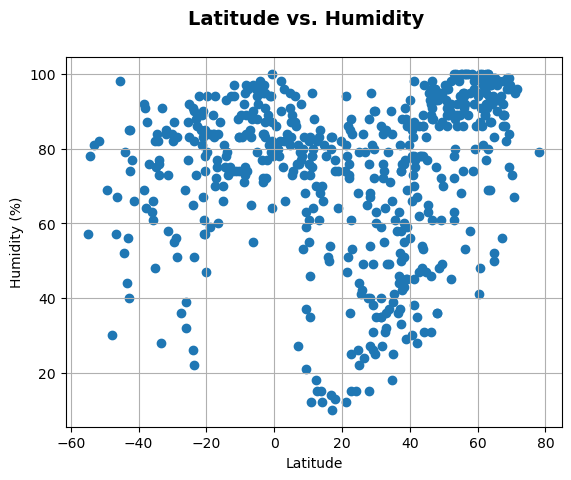

In [8]:
# Plotting
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"])

# Lines

plt.grid(True)

# Setting labels
plt.suptitle("Latitude vs. Humidity", fontsize=14, fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/lat_hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

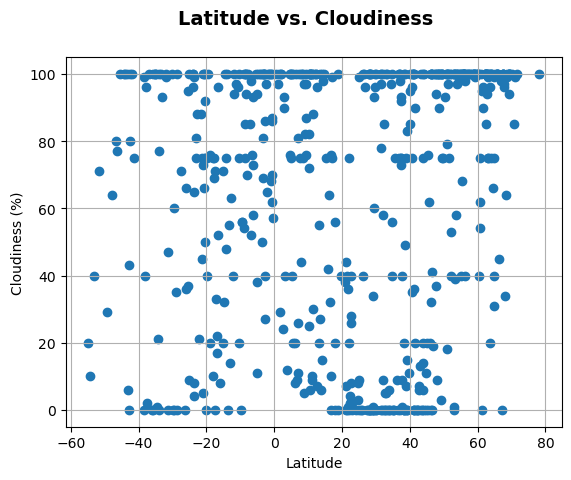

In [9]:
# Plotting
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"])
plt.grid(True)

# Setting labels
plt.suptitle("Latitude vs. Cloudiness", fontsize=14, fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

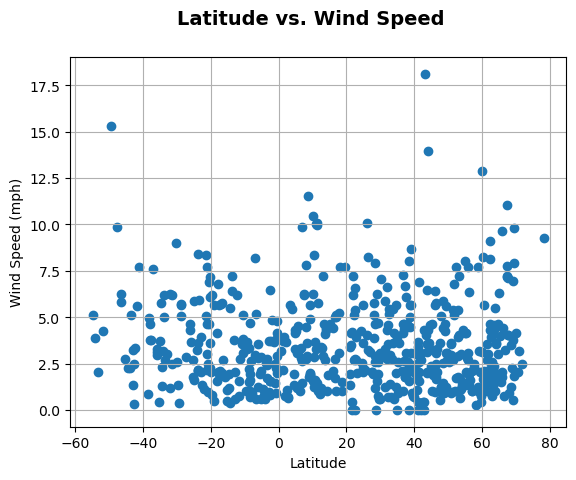

In [15]:
# Plotting
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"])
plt.grid(True)

# Setting labels
plt.suptitle("Latitude vs. Wind Speed", fontsize=14, fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/lat_wind.png")
plt.show()

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
city_weather_df
southern_df = city_weather_df.loc[city_weather_df["Lat"] < 0]
northern_df = city_weather_df.loc[city_weather_df["Lat"] >= 0]
print(northern_df.shape)
print(southern_df.shape)
print(city_weather_df.shape)
# For each of the above plots calculate and plot a linear regression using the steps below
# Set your x and y and reshape to np array
# Fit your Model
# Generate predictions and store in df
# Plot the data for each plot

(397, 9)
(169, 9)
(566, 9)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

/var/folders/5b/jrl9kzxj4qs4lcdlk60mk3br0000gq/T/ipykernel_54755/2149178876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_df['YPRED_Temp'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Max Temp'>

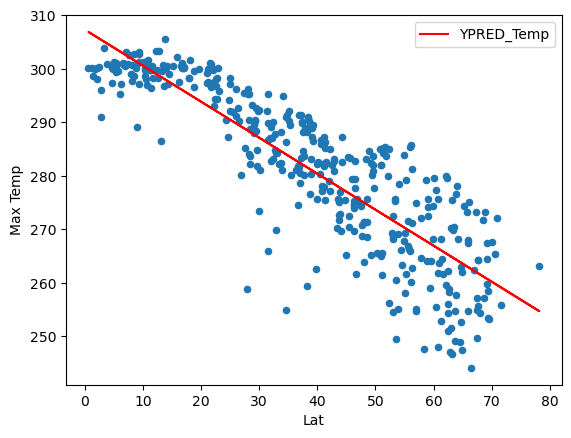

In [18]:
#Set your x and y and reshape to np array
x = northern_df['Lat'].values.reshape(-1, 1) 
y = northern_df['Max Temp'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
northern_df['YPRED_Temp'] = linear_regressor.predict(x)

# Plot the data
ax = northern_df.plot.scatter(x='Lat', y='Max Temp')
northern_df.plot(x='Lat', y='YPRED_Temp', color='red', ax=ax)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

/var/folders/5b/jrl9kzxj4qs4lcdlk60mk3br0000gq/T/ipykernel_54755/2253242396.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_df['YPRED_Temp'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Max Temp'>

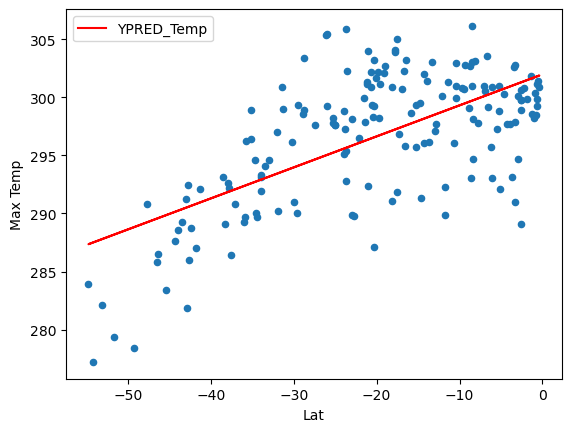

In [19]:
#Set your x and y and reshape to np array
x = southern_df['Lat'].values.reshape(-1, 1) 
y = southern_df['Max Temp'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
southern_df['YPRED_Temp'] = linear_regressor.predict(x)

# Plot the data
ax = southern_df.plot.scatter(x='Lat', y='Max Temp')
southern_df.plot(x='Lat', y='YPRED_Temp', color='red', ax=ax)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

/var/folders/5b/jrl9kzxj4qs4lcdlk60mk3br0000gq/T/ipykernel_54755/2662496993.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_df['YPREDN_Hum'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Humidity'>

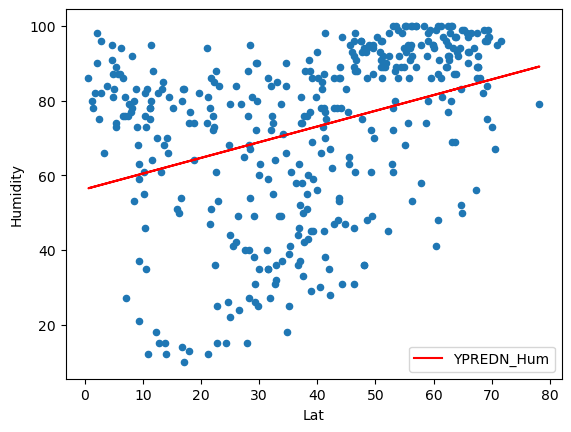

In [20]:
#Set your x and y and reshape to np array
x = northern_df['Lat'].values.reshape(-1, 1) 
y = northern_df['Humidity'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
northern_df['YPREDN_Hum'] = linear_regressor.predict(x)

# Plot the data
ax = northern_df.plot.scatter(x='Lat', y='Humidity')
northern_df.plot(x='Lat', y='YPREDN_Hum', color='red', ax=ax)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

/var/folders/5b/jrl9kzxj4qs4lcdlk60mk3br0000gq/T/ipykernel_54755/2899339703.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_df['YPREDS_Hum'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Humidity'>

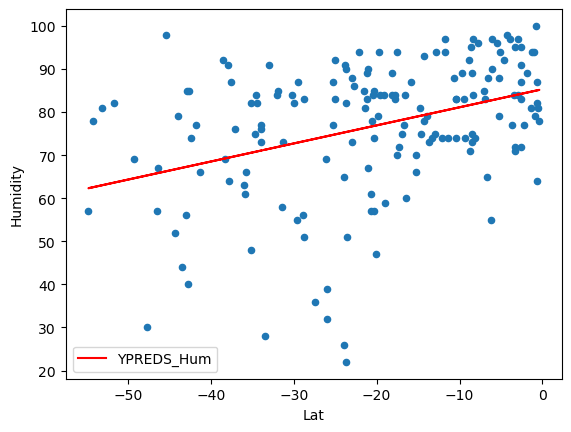

In [21]:
x = southern_df['Lat'].values.reshape(-1, 1) 
y = southern_df['Humidity'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
southern_df['YPREDS_Hum'] = linear_regressor.predict(x)

# Plot the data
ax = southern_df.plot.scatter(x='Lat', y='Humidity')
southern_df.plot(x='Lat', y='YPREDS_Hum', color='red', ax=ax)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

/var/folders/5b/jrl9kzxj4qs4lcdlk60mk3br0000gq/T/ipykernel_54755/655126910.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_df['YPREDN Cloudiness'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Cloudiness'>

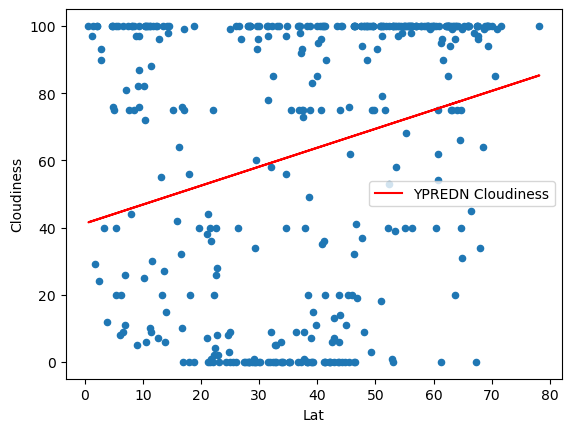

In [22]:
#Set your x and y and reshape to np array
x = northern_df['Lat'].values.reshape(-1, 1) 
y = northern_df['Cloudiness'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
northern_df['YPREDN Cloudiness'] = linear_regressor.predict(x)

# Plot the data
ax = northern_df.plot.scatter(x='Lat', y='Cloudiness')
northern_df.plot(x='Lat', y='YPREDN Cloudiness', color='red', ax=ax)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

/var/folders/5b/jrl9kzxj4qs4lcdlk60mk3br0000gq/T/ipykernel_54755/1170146136.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_df['YPREDS Cloudiness'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Cloudiness'>

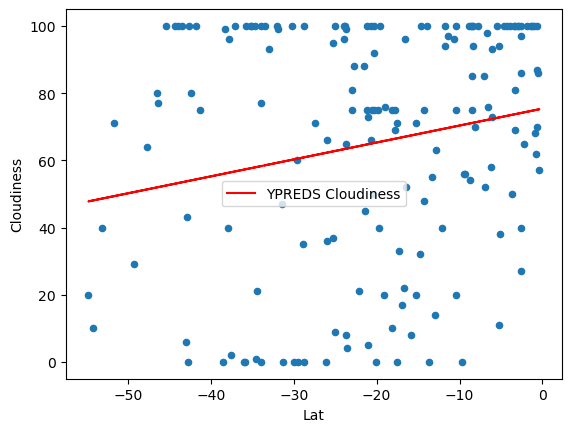

In [23]:
#Set your x and y and reshape to np array
x = southern_df['Lat'].values.reshape(-1, 1) 
y = southern_df['Cloudiness'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
southern_df['YPREDS Cloudiness'] = linear_regressor.predict(x)

# Plot the data
ax = southern_df.plot.scatter(x='Lat', y='Cloudiness')
southern_df.plot(x='Lat', y='YPREDS Cloudiness', color='red', ax=ax)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

/var/folders/5b/jrl9kzxj4qs4lcdlk60mk3br0000gq/T/ipykernel_54755/2871994480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_df['YPREDN Wind Speed'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Wind Speed'>

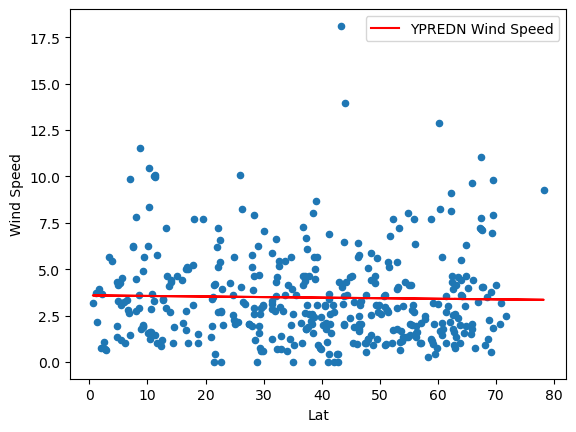

In [24]:
#Set your x and y and reshape to np array
x = northern_df['Lat'].values.reshape(-1, 1) 
y = northern_df['Wind Speed'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
northern_df['YPREDN Wind Speed'] = linear_regressor.predict(x)

# Plot the data
ax = northern_df.plot.scatter(x='Lat', y='Wind Speed')
northern_df.plot(x='Lat', y='YPREDN Wind Speed', color='red', ax=ax)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

/var/folders/5b/jrl9kzxj4qs4lcdlk60mk3br0000gq/T/ipykernel_54755/2621542881.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_df['YPREDS Wind Speed'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Wind Speed'>

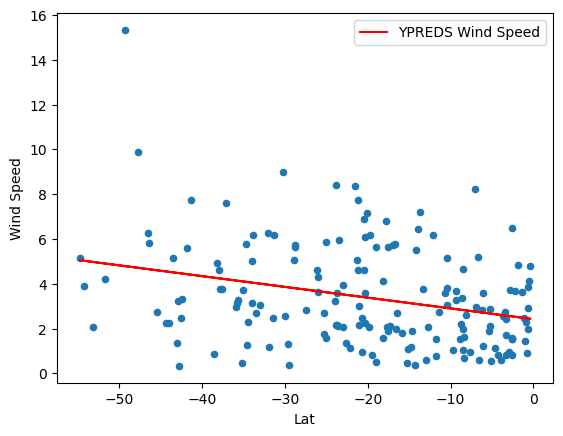

In [25]:
#Set your x and y and reshape to np array
x = southern_df['Lat'].values.reshape(-1, 1) 
y = southern_df['Wind Speed'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
southern_df['YPREDS Wind Speed'] = linear_regressor.predict(x)

# Plot the data
ax = southern_df.plot.scatter(x='Lat', y='Wind Speed')
southern_df.plot(x='Lat', y='YPREDS Wind Speed', color='red', ax=ax)